1.- Importacion de datos y standarizacion de nombre de columnas

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

#housing = datasets.fetch_california_housing()
dataset = pd.read_csv("./data/ice_cream_data.csv")

# Crear un DataFrame con los datos y los nombres de las características
#dataset = pd.DataFrame(data=housing.data, columns=housing.feature_names)
#dataset['MedianaPrecioVivienda'] = housing.target
# Imprimir las primeras 10 filas del DataFrame

#print(dataset.shape)
#print(housing.DESCR)
#print(dataset)




(20640, 9)
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one

Analisis de la columna Profit, con respecto a la frecuencia de datos

<Axes: >

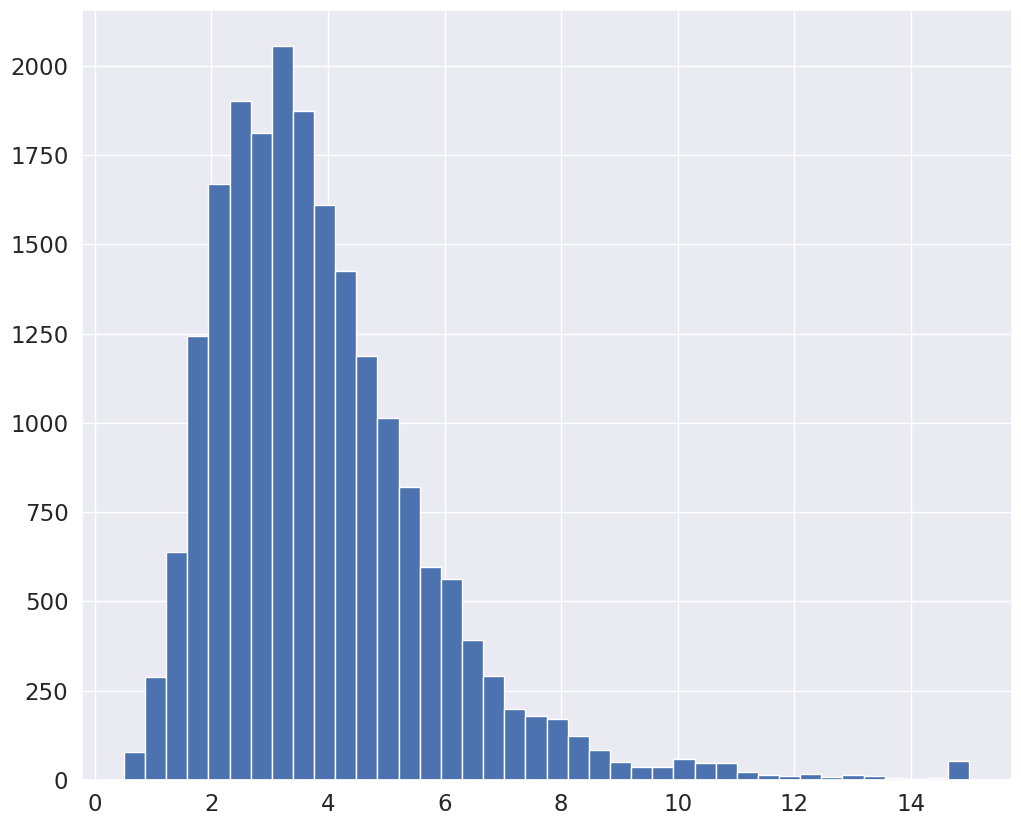

In [89]:
dataset.MedInc.hist(bins=40)

Analizando las correlaciones de manera gráfica

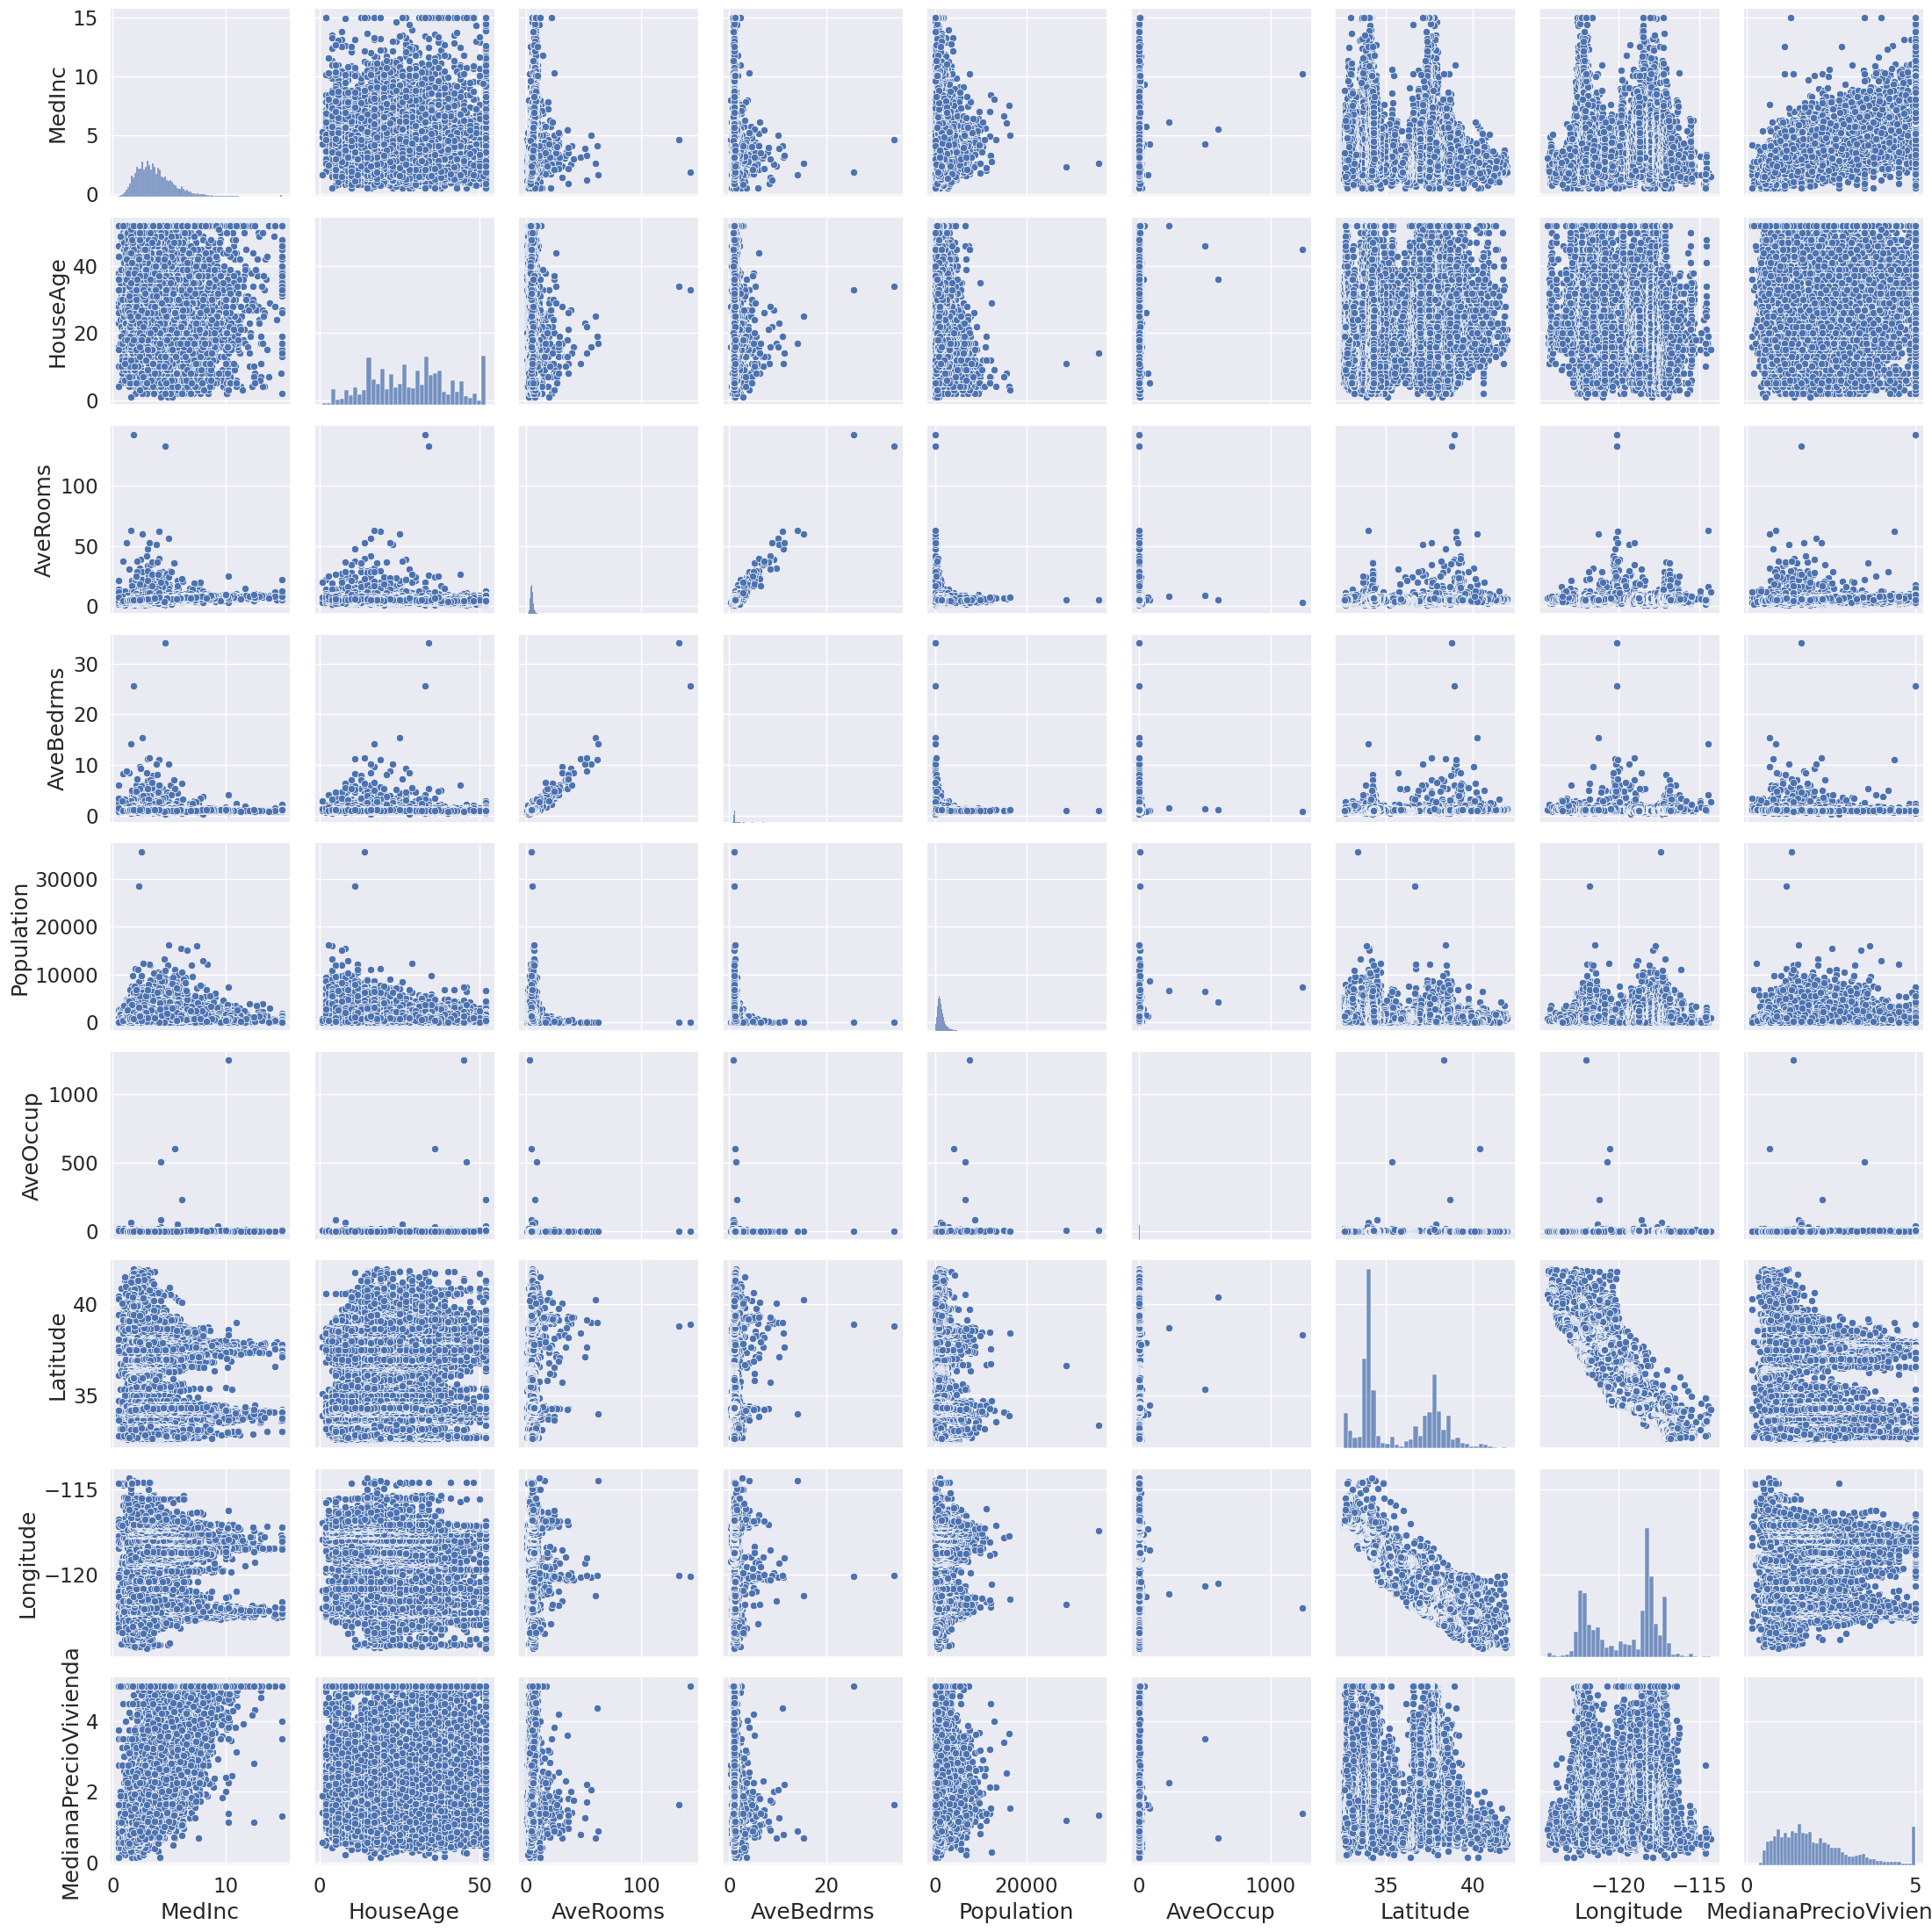

In [75]:
import matplotlib.pyplot  as plt
import seaborn as sns
sns.pairplot(dataset, height=2.5)
plt.show()

Analizando las correlaciones mediante un mapa de calor

<Axes: >

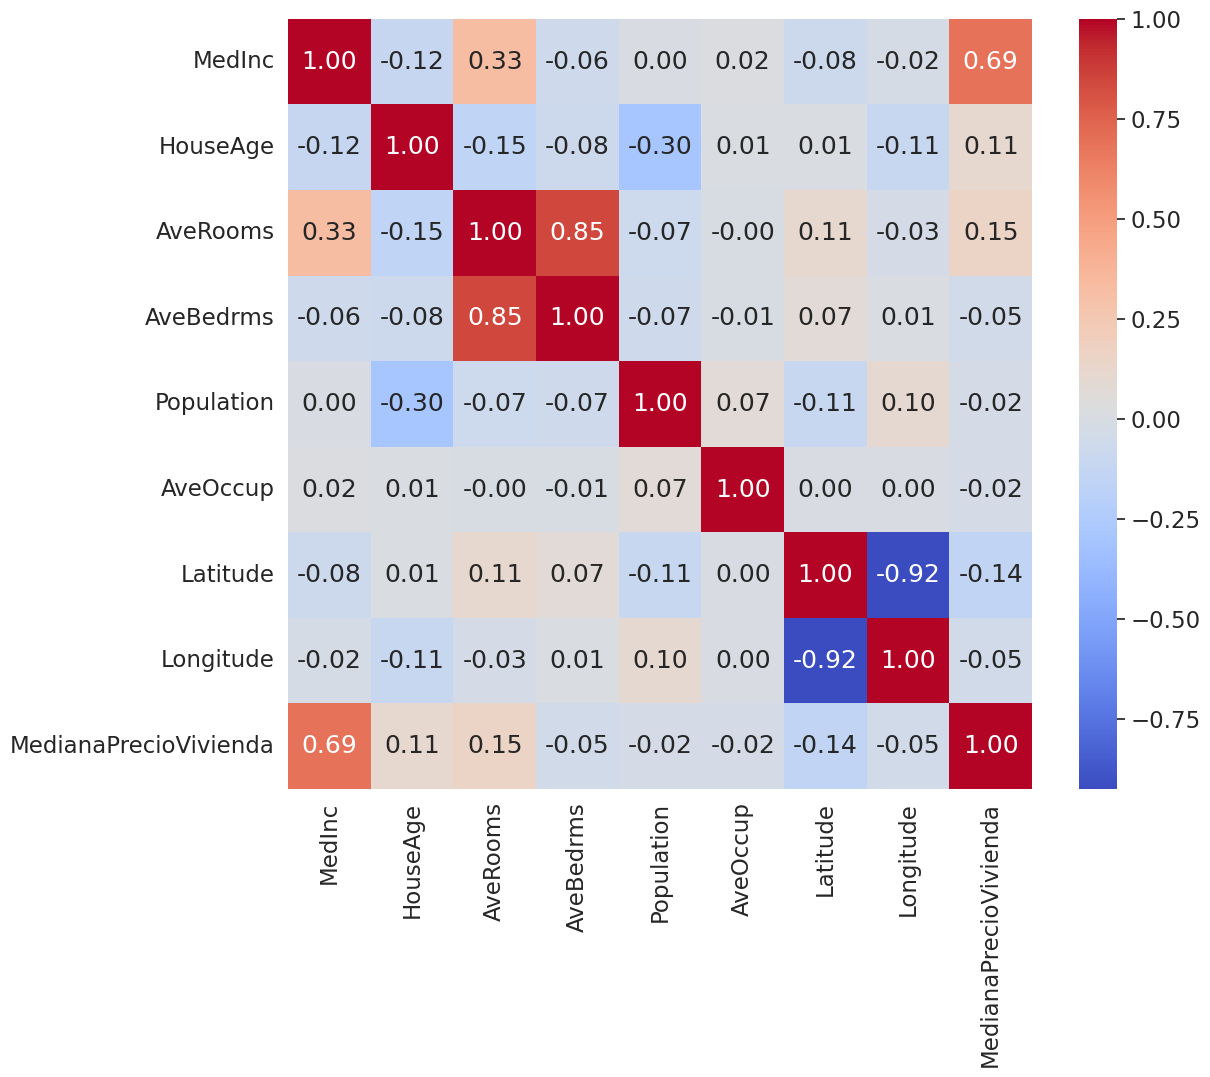

In [76]:
import numpy as np
import matplotlib.pyplot as plt
#MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude
numeric_cols = ['MedInc',  'HouseAge','AveRooms','AveBedrms', 'Population','AveOccup', 'Latitude' ,  'Longitude', 'MedianaPrecioVivienda' ]
cm = np.corrcoef(dataset[numeric_cols].values.T)
sns.set_theme(font_scale=1.5, rc={"figure.figsize": (12, 10)})
sns.heatmap(cm, annot=True, fmt=".2f", cmap="coolwarm",yticklabels=numeric_cols, xticklabels=numeric_cols)



(20640, 1)
(20640, 8)
(20640, 1)


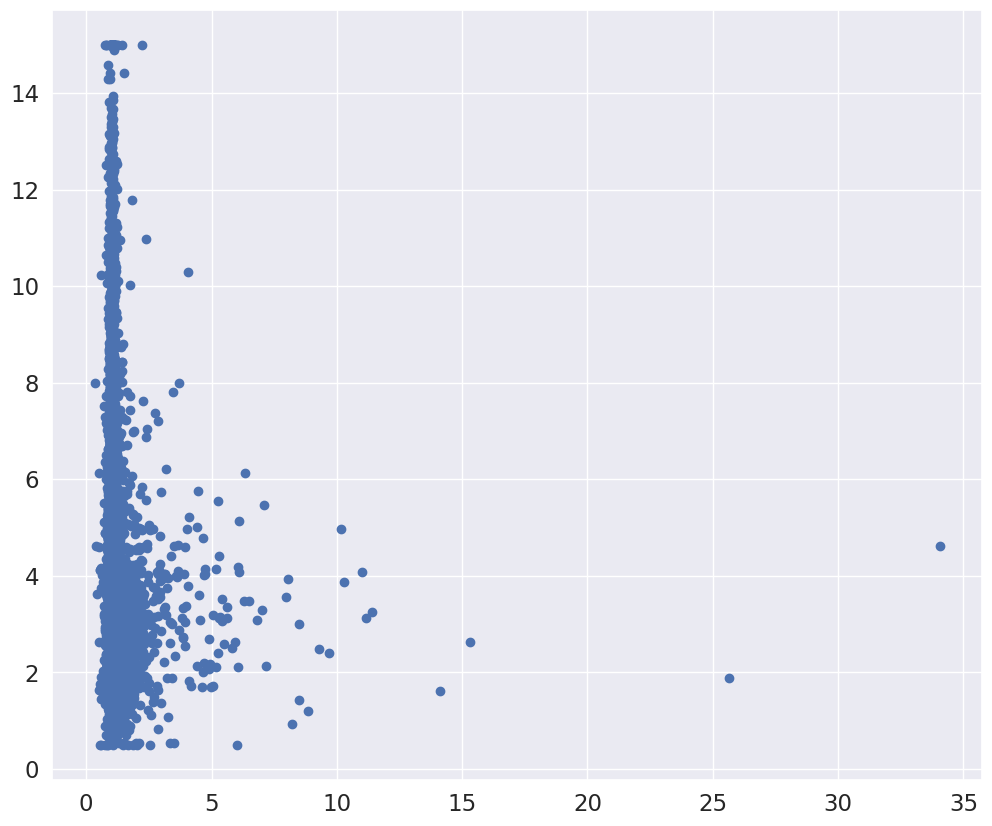

In [109]:
X_cols = list(set(dataset.columns)-set(['MedInc']))
X_analisis =  ['AveBedrms']
y_cols = ['MedInc']

x_analisis = dataset[X_analisis].values
x = dataset[X_cols].values
y = dataset[y_cols].values

print(x_analisis.shape)
print(x.shape)
print(y.shape)
plt.scatter(x_analisis,y)
#plt.xlabel('Numero de habitaciones')
#plt.ylabel('Valor Medio')

3. Division de datos de entrenamiento y test usando standard sklearn

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)




In [115]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_train_poly = poly_reg.fit_transform(X_train);
X_test_poly = poly_reg.fit_transform(X_test);

regresion = LinearRegression()
regresion.fit(X_train_poly, y_train)

LinearRegression()

In [107]:
y_predict = regresion.predict(X_test_poly)    



(20640, 1)
(20640, 1)


Text(0, 0.5, 'Sueldo en dolares')

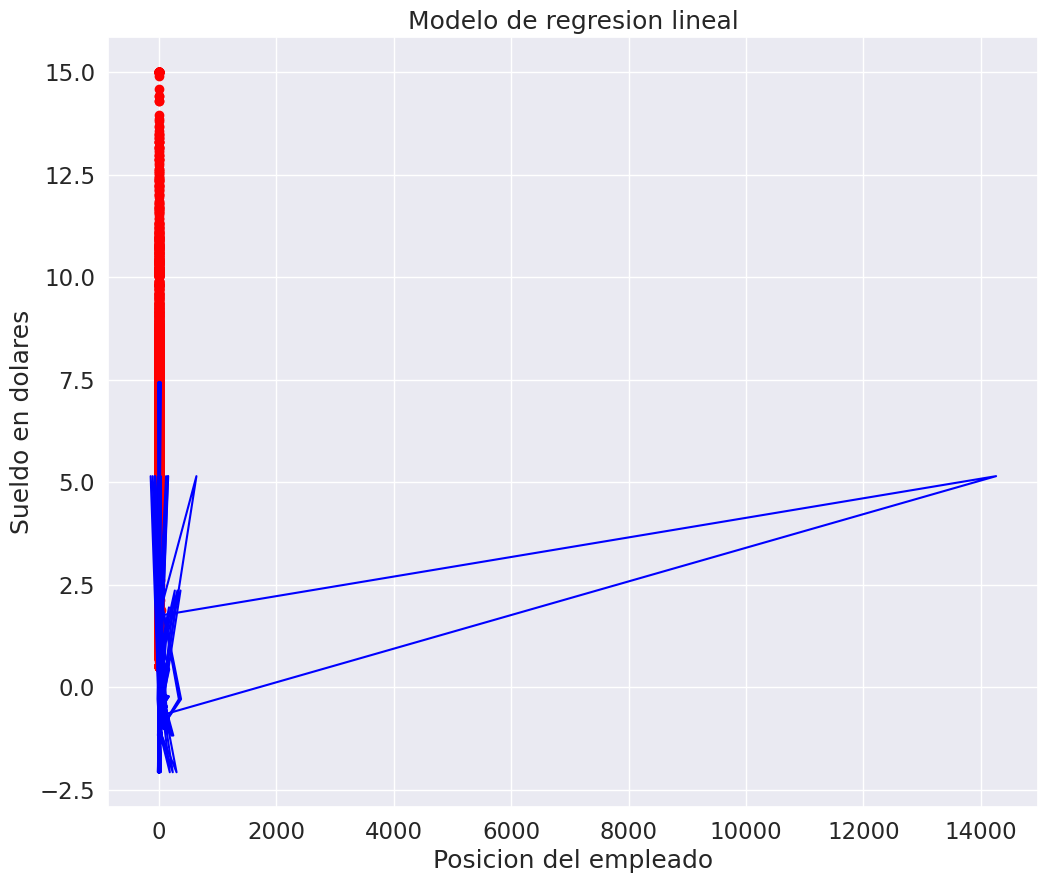

In [114]:
print(x_analisis.shape)
print(y.shape)
plt.scatter(x_analisis,y,color="red")

plt.plot(X_test_poly, regresion.predict(X_test_poly), color="blue")
plt.title ("Modelo de regresion lineal")
plt.xlabel("Posicion del empleado")
plt.ylabel("Sueldo en dolares")

4. Entrenamiento del modelo

In [116]:
regresion = LinearRegression()
regresion.fit(X_train, y_train)
y_pred = regresion.predict(X_test)
y_pred.shape

(4128, 1)

5. Evaluando el modelo

In [117]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("r2: ",r2.round(4))
print("mse: ",mse.round(4))

r2:  0.7374
mse:  0.2548


In [ ]:
from regressors import stats
print(regresion.intercept_)
regresion.intercept_=regresion.intercept_[0]
regresion.coef_=regresion.coef_.reshape(-1) 
y_test =y_test.reshape(-1)
print("===============sumary============")
stats.summary(regresion, X_test,y_test,X_cols)

[0.00180092]
===============sumary============
Residuals:
    Min      1Q  Median     3Q    Max
-3.5231 -0.2641  0.1254 0.4096 2.4296


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  0.001801    0.009812   0.1835  0.854385
AveRooms   -0.211499    0.023220  -9.1084  0.000000
AveBedrms   0.243624    0.022768  10.7004  0.000000
AveOccup   -0.042708    0.005297  -8.0626  0.000000
Longitude  -0.753812    0.023596 -31.9469  0.000000
Latitude   -0.780095    0.024041 -32.4482  0.000000
HouseAge    0.101356    0.010551   9.6067  0.000000
Population -0.007421    0.010709  -0.6930  0.488377
MedInc      0.713421    0.012551  56.8396  0.000000
---
R-squared:  0.59432,    Adjusted R-squared:  0.59354
F-statistic: 754.30 on 8 features


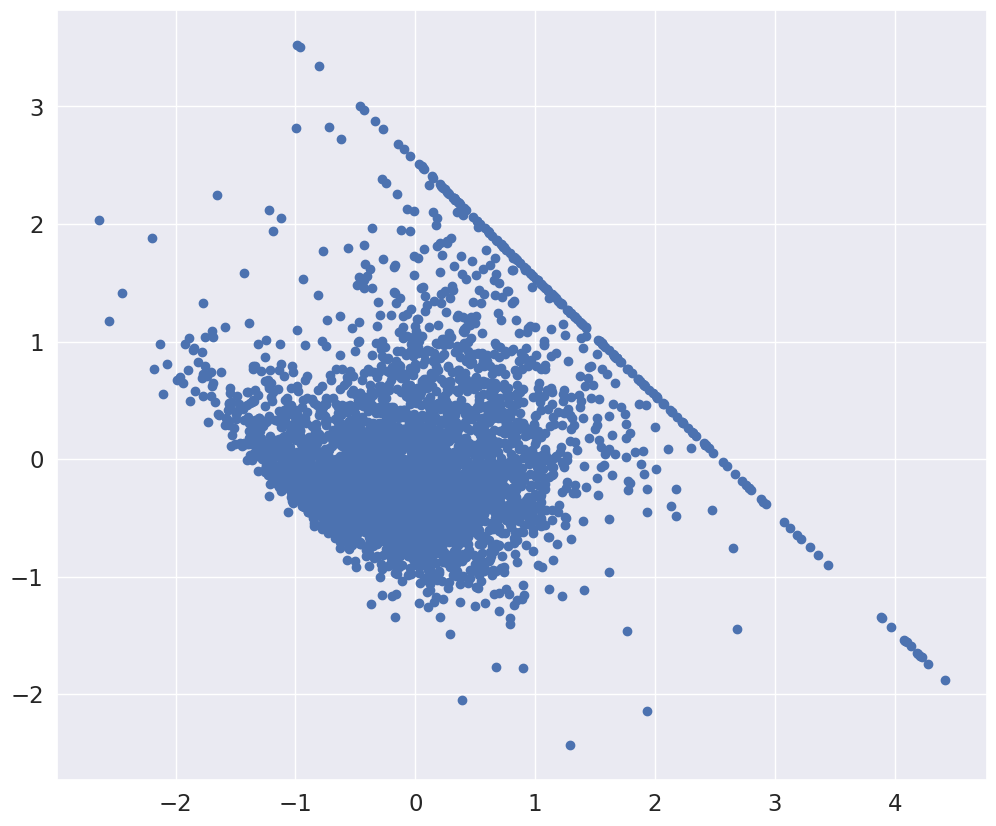

In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

5. Creacion del modelo como PKL

In [ ]:
from joblib import dump
dump(regresion, './model/model-profit.pkl')

['./model/model-profit.pkl']